In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [10]:
df = pd.read_csv('../../fampay_instagram_comments_all.csv')
# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(df, source='username', target='shortcode')

In [13]:
# Compute the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Filter the graph to only include the top 100 nodes with the highest degree centrality
top_users = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:100]
G_top = G.subgraph(top_users)

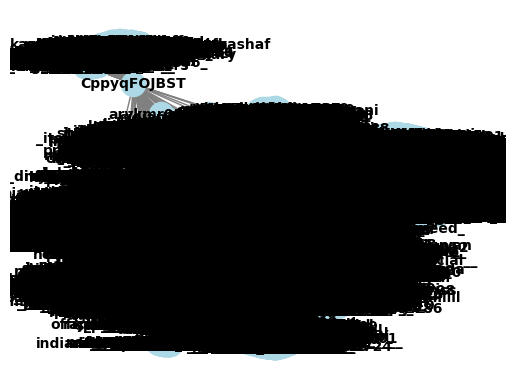

In [12]:
# Create a visualization of the network
fig, ax = plt.subplots()
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', ax=ax)
plt.show()

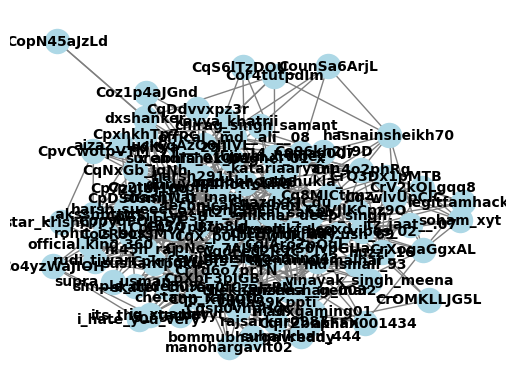

In [14]:
# Create a visualization of the filtered network
fig, ax = plt.subplots()
nx.draw(G_top, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', ax=ax)
plt.show()

In [18]:
# Compute the layout of the filtered graph using the Fruchterman-Reingold algorithm
pos = nx.spring_layout(G_top) #type: ignore

# Add the 'pos' attribute to each node in the filtered graph
for node in G_top.nodes():
    G_top.nodes[node]['pos'] = pos[node]

# Create a Plotly figure of the filtered network
fig = go.Figure()

# Add edges to the figure
edge_x = []
edge_y = []
for edge in G_top.edges():
    x0, y0 = G_top.nodes[edge[0]]['pos']
    x1, y1 = G_top.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(color='gray', width=0.5), hoverinfo='none'))

# Add nodes to the figure
node_x = []
node_y = []
node_text = []
for node in G_top.nodes():
    x, y = G_top.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(color='lightblue', size=8), text=node_text, hovertemplate='%{text}', hoverinfo='text'))

# Set the layout of the figure
fig.update_layout(title='Instagram User Network', showlegend=False, hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Display the figure
fig.show()

In [19]:
# Create a sample graph
G = nx.karate_club_graph()

# Compute the layout of the graph using the Fruchterman-Reingold algorithm
pos = nx.spring_layout(G)

# Add the 'pos' attribute to each node in the graph
for node in G.nodes():
    G.nodes[node]['pos'] = pos[node]

# Create a Plotly figure of the network
fig = go.Figure()

# Add edges to the figure
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(color='gray', width=1), hoverinfo='none'))

# Add nodes to the figure
node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(color='lightblue', size=15), text=node_text, hovertemplate='%{text}', hoverinfo='text'))

# Set the layout of the figure
fig.update_layout(title='Karate Club Network', showlegend=False, hovermode='closest',
                  margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Add interactivity to the figure
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"edge_color": "gray"}],
                    label="Gray edges",
                    method="restyle"
                ),
                dict(
                    args=[{"edge_color": "red"}],
                    label="Red edges",
                    method="restyle"
                ),
                dict(
                    args=[{"edge_color": "blue"}],
                    label="Blue edges",
                    method="restyle"
                )
            ]),
            showactive=True,
            pad={"r": 10, "t": 10},
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

# Add style options to the figure
fig.update_traces(marker=dict(line=dict(width=2, color='black')))

# Display the figure
fig.show()